# Individual Project

#### Name: Bhuvanesh Sripuram

#### Id: 0769209

Deciding whether a used car is worth the posted price when you see 
listings online can be difficult. Several factors, including mileage, 
make, model, year, etc. can influence the actual worth of a car. From 
the perspective of a seller, it is also a dilemma to price a used car 
appropriately. Based on existing data, the aim is to use machine 
learning algorithms to develop models for predicting used car prices

<img src="index.jpg" width=1000 align="center">

In [1]:
#importing all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import numpy as np
%matplotlib inline 
plt.rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data from csv file and assigning it to variable data
data = pd.read_csv('usedcar-data.csv')

In [3]:
#lets have a look at some data
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#getting the info of various variables in data and their count and type of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
#checking for the null values in data
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
#dropping the columns which are unnecessary and having high null values.
data.drop(columns=['New_Price','Unnamed: 0'], inplace = True)

In [7]:
#replacing the text null bhp with np.nan
data['Power'].replace(['null bhp'], np.nan, inplace = True)

In [8]:
#Again checking for null values
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [9]:
#dropping the rows that contain null values 
data = data.dropna()

In [10]:
#Again checking the non-null count and type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 596.4+ KB


In [11]:
data['Name'] = data['Name'].str.split(" ",expand=True)
data['Mileage'] = data['Mileage'].str.split(" ",expand=True)
data['Engine'] = data['Engine'].str.split(" ",expand=True)
data['Power'] = data['Power'].str.split(" ",expand=True)

splitted the colums as they contain more information which we dont need and to seperate the number from the text form

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 596.4+ KB


In [13]:
#converting/formatting the columns into float.
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

performed preprocessing like data cleaning, transformation, filling in missing values,and fixing the discrepancies in the data.
Encoded the categorical variables.

# Exploratory data analysis (EDA)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Percentage'>

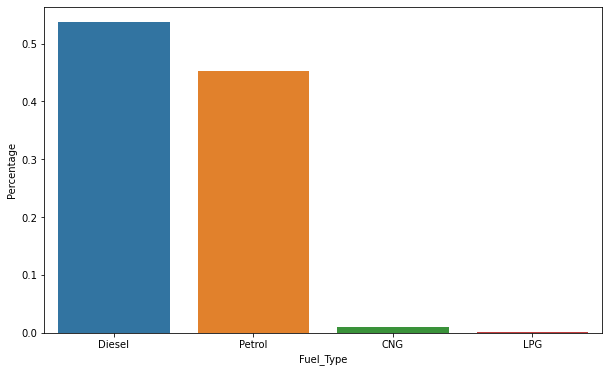

In [14]:
eda_percentage = data['Fuel_Type'].value_counts(normalize = True).rename_axis('Fuel_Type').reset_index(name = 'Percentage')
sns.barplot(x = 'Fuel_Type', y = 'Percentage', data = eda_percentage)

vehicles using diesel are more compared to the petrol, CNG and LPG

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

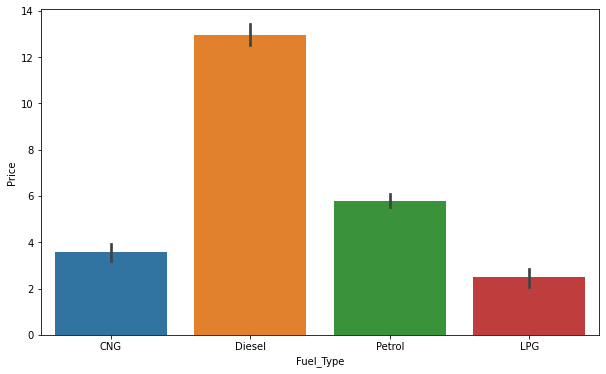

In [15]:
sns.barplot(y=data['Price'], x=data['Fuel_Type'])

We can see the huge difference in prices based on fuel too.
Diesel and Electric being on the high range.
Though it can also be because few high end models have diesel or electric type, like Audi

<AxesSubplot:xlabel='Price', ylabel='Location'>

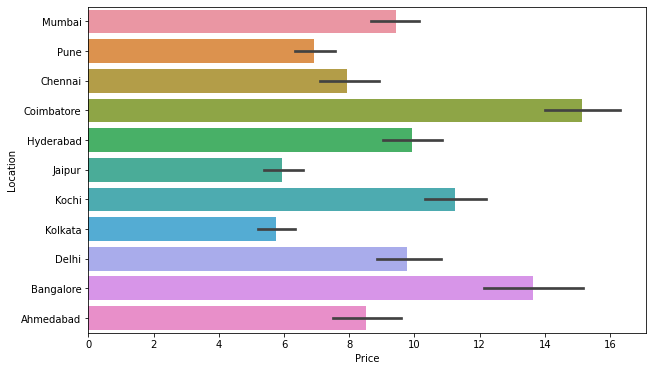

In [16]:
sns.barplot(y="Location", x="Price", data=data)



Coimbatore and Bangalore can be seen to have the highest prices, and Kolkata having the least.

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

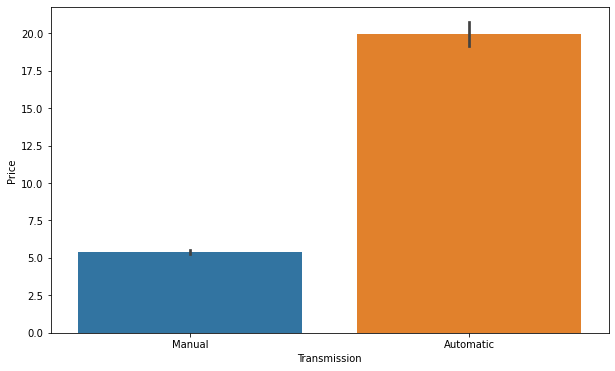

In [17]:
sns.barplot(y=data['Price'], x=data['Transmission'])



we can see the difference in price, the gap is huge, and can be prevalent because

Newer models, which are costly have automatic type

Older models who have automatic type are mainly high end and hence cost high



<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

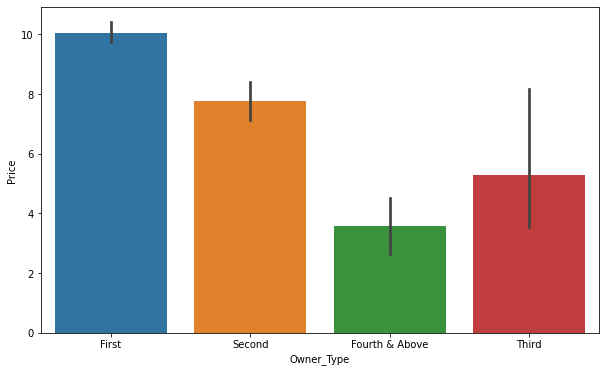

In [18]:
sns.barplot(y=data['Price'], x=data['Owner_Type'])

The graph makes perfect sense! We can clearly see that with increase in buying selling, the prices fall.

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

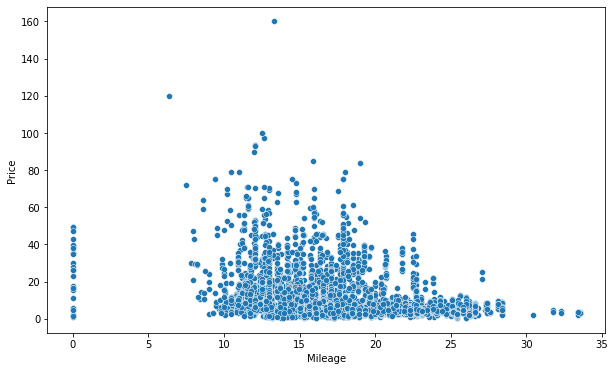

In [19]:
sns.scatterplot(x=data['Mileage'], y=data['Price'])

We can see no clear pattern here, the cars with high mileage are low priced. Most of the data is clustered between 10 and 30 km/l

<AxesSubplot:xlabel='Power', ylabel='Price'>

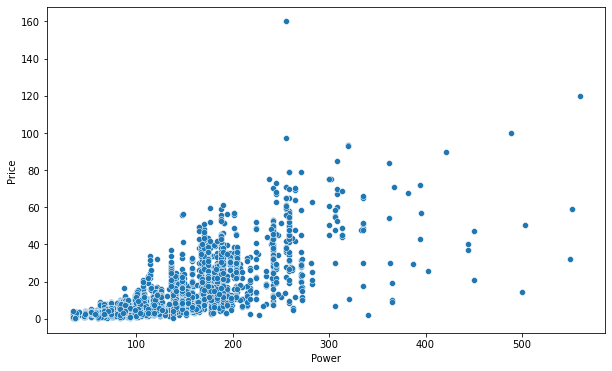

In [20]:
sns.scatterplot(x=data['Power'], y=data['Price'])

We can see the two variables were strongly correlated till 300bph, after which the correlation has weakened considerably

<AxesSubplot:xlabel='Engine', ylabel='Price'>

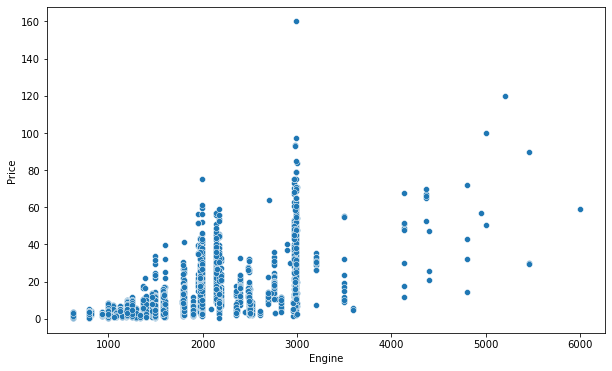

In [21]:
sns.scatterplot(x=data['Engine'], y=data['Price'])

We can clearly see a positive correlation here, but it has crashes here are there. For example as 3500cc the price has dropped as compared to 3200cc

<AxesSubplot:xlabel='Name', ylabel='Price'>

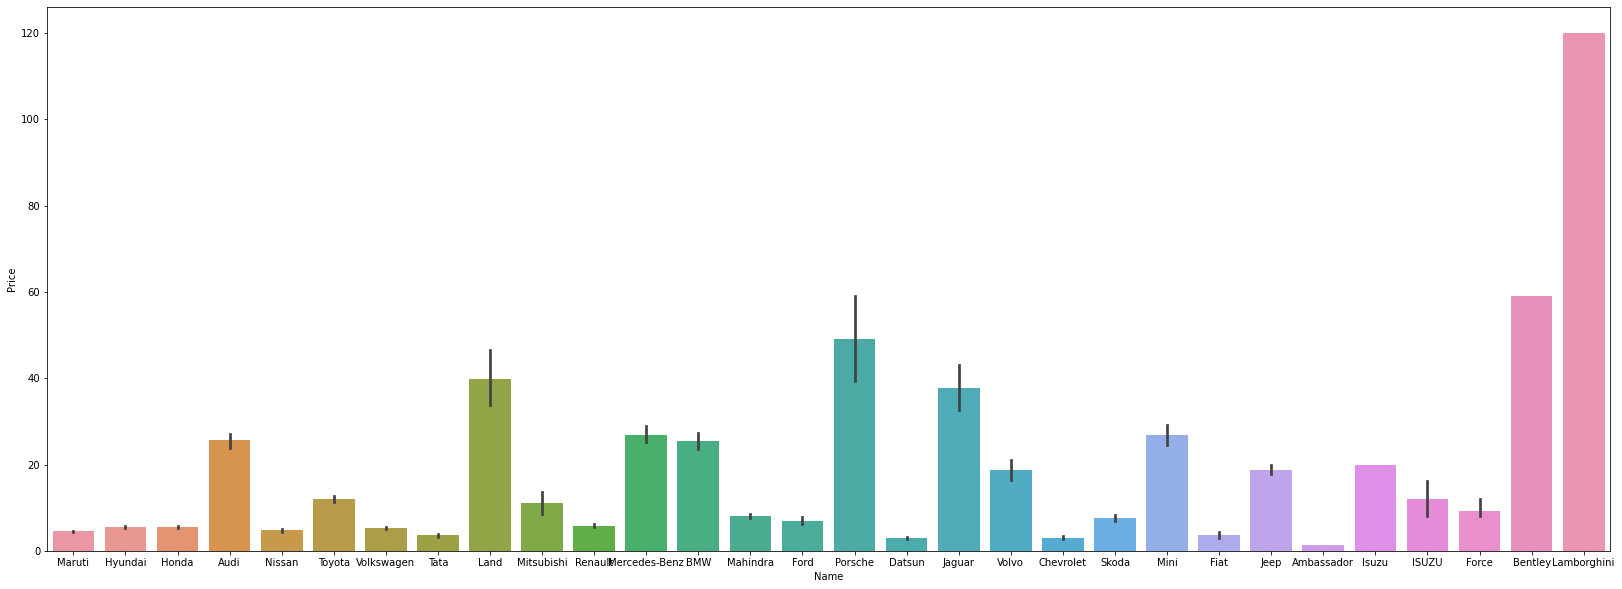

In [22]:
fig, ax = plt.subplots(figsize=(28,10))
sns.barplot(x="Name", y="Price", data=data)


Lamborghini has the highest price, while Ambassador,Datsun, Chevrolet and Fiat are the lowest. This can be because of the low availibility of their spare parts and the discontinuation of Chevrolet.

 Audi, Porsche and Mercedes, have considerably lower price.


<AxesSubplot:xlabel='Year', ylabel='Price'>

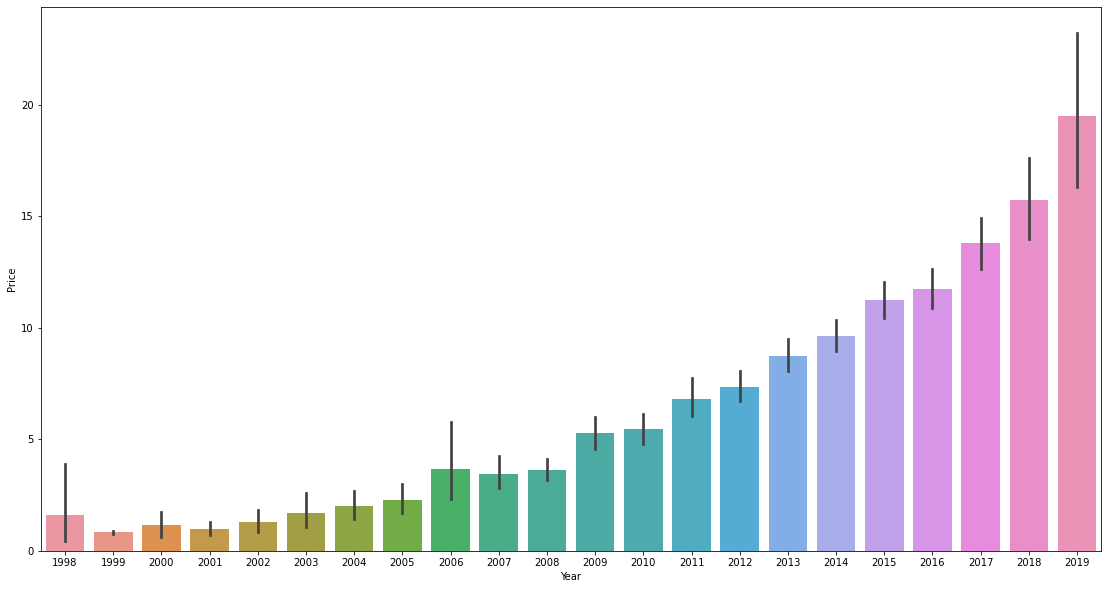

In [23]:
fig, ax = plt.subplots(figsize=(19,10))
sns.barplot(x="Year", y="Price", data=data)


As we already know Newer the car, higher the price.


In [24]:
#encoding the non-numeric variables
#we must encode it to numbers before we can fit and evaluate a machine learning model.
from sklearn.preprocessing import LabelEncoder
object_cols = ['Name', 'Location',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(data[col])
    data[col] = label_encoder.transform(data[col])

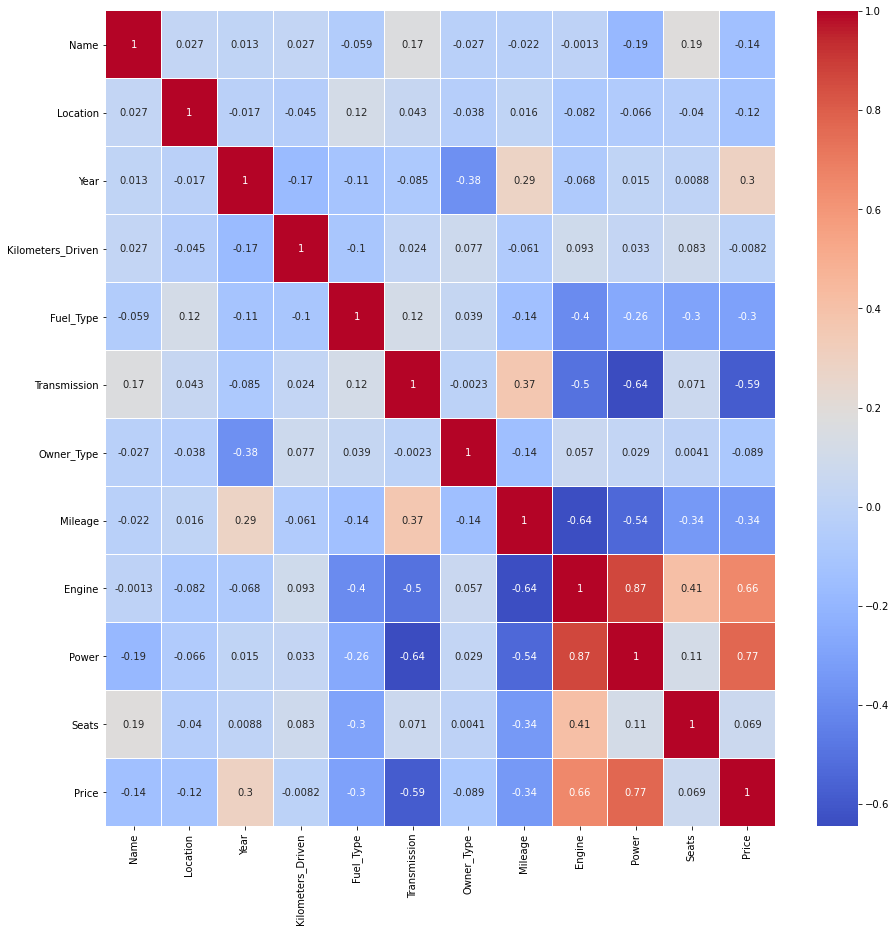

In [25]:
#Heatmap is used to check the relation between the various variables and also how 
#price is affected by various features.
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))  
heat_map = sns.heatmap(data.corr(), linewidth=0.05,annot=True,ax=ax,cmap='coolwarm')

Engine, power, year, transmission and mileage are the most strong factors that affecting the price.

In [26]:
#importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics

In [27]:
#splitting the data into test and train with the test size of 20% and 80% using the train test split
from sklearn.model_selection import train_test_split
X = data.drop('Price', axis = 1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 12)

In [28]:
#Linear regression is a linear model
#A model that assumes a linear relationship between the input variables and the single output variable
#fitting the model on train data we splitted above
#predicting the accuracy on both training and testing set.
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.6958452470304886
Accuracy on Testing set:  0.7202299250586333


In [29]:
#Random Forest operates by constructing several decision trees during training time
#and outputting the mean of the classes as the prediction of all the trees.
#fitting the model on train data we splitted above
#predicting the accuracy on both training and testing set.
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Training set:  0.9843669054118972
Accuracy on Testing set:  0.9340592450357668


Accuracy of random forest is good compared to that of the linear regression and there is a
huge difference between accuracies of both nearly 20 percent.

Accuracy on Training set:  0.98
Accuracy on Testing set:  0.93

In [30]:
#these metrics are used to evaluate the performance/ effectiveness of our machine learning model
#mse is average of the square of the difference between the original values and the predicted values.
#mae is magnitude of difference between the prediction of an observation and the true value of that observation.
#Rmse is square root of the mean of the squared differences between actual outcomes and predictions.
#R square is statistical measure that represents the goodness of fit of a regression model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.3538833563323205
Mean Squared  Error      :  7.735322584137404
Root Mean Squared  Error :  2.7812447904018454
R Squared Error          :  0.9340592450357668


# Conclusion

used cars have a huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The main reason for this huge market is that when you buy a New Car and sale it just another day without any default on it, the price of car reduces by 20%.

There are also many frauds in the market who not only sale wrong but also they could mislead to wrong price.

So, here I used this following dataset to Predict the price of any used car which will help many people to 
check the price of the car before they gonna buy it and to make a better decision.